# Cas Kaggle: Predicció del Guanyador de Partides d’Escacs (Lichess)

**Autors:** Naroa Sarrià (1706167), Inés Gómez (1704361)  
**Assignatura:** Aprenentatge Computacional – UAB (2025)

**Dataset original:** https://www.kaggle.com/datasnaek/chess  
**Repositori GitHub:** https://github.com/NIU1706167/CasKaggle-Chess

## 4. Model Selection i Cross Validation

### Model una vegada comença la partida

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from metric_selection import metriques, grafiques, curva_ROC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from funcions import count_plies,add_move_features

%matplotlib inline
sns.set_style('whitegrid')

In [ ]:
df = pd.read_csv("games_preprocessed.csv")

Provarem primer de mirar que obtenim amb els models utilitzant només els nombre de moviment d'obertura de cada partida.

In [3]:
df["num_plies"] = df["moves"].apply(count_plies)

df_filtered = df[df["num_plies"] >= df['opening_ply']].copy()
df_filtered.reset_index(drop=True, inplace=True)

df_filtered = add_move_features(df_filtered, n_moves=df['opening_ply'])

In [4]:
# N = opening_ply

explanatory_variables = [
                        #Variables prèvies
                        'diff_rating', 
                        'diff_global_winrate',
                        'vs_white_winrate', 'vs_prev_matches',
                        'diff_win_streak',
                        'diff_loss_streak',

                        'white_piece_count', 'black_piece_count',

                        # Variables de material
                        'white_material_value', 'black_material_value', 'material_balance',
                        
                        # Control del centre
                        'white_center_control',
                        'black_center_control',
                        
                        # Mobilitat
                        'white_mobility',
                        'black_mobility',
                        
                        # PST / Piece-Square Table
                        'white_PST',
                        'black_PST',
                        
                        # Espai
                        'white_space',
                        'black_space'
                        ]
target_variable = "winner"

X = df_filtered[explanatory_variables]
y = df_filtered[target_variable]  # 1 = white, 0 = black

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Logistic Regression
              precision    recall  f1-score   support

           0       0.66      0.63      0.64      1783
           1       0.68      0.71      0.69      1981

    accuracy                           0.67      3764
   macro avg       0.67      0.67      0.67      3764
weighted avg       0.67      0.67      0.67      3764

Accuracy: 0.6681721572794899


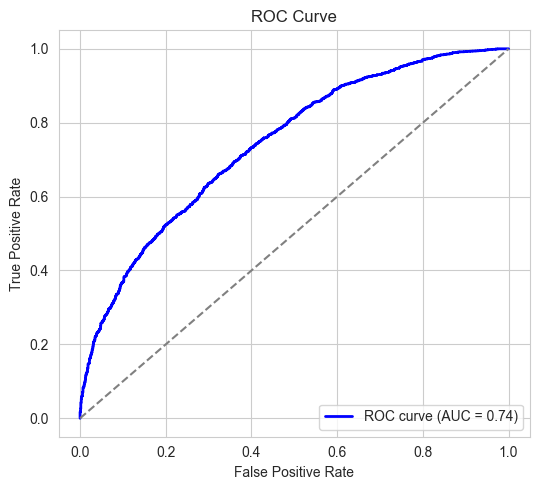

In [5]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

print("Logistic Regression")
metriques(log_model,X_test,y_test)
curva_ROC(log_model,X_test,y_test)

Gradient Boosting
              precision    recall  f1-score   support

           0       0.66      0.63      0.64      1783
           1       0.68      0.71      0.69      1981

    accuracy                           0.67      3764
   macro avg       0.67      0.67      0.67      3764
weighted avg       0.67      0.67      0.67      3764

Accuracy: 0.6700318809776833


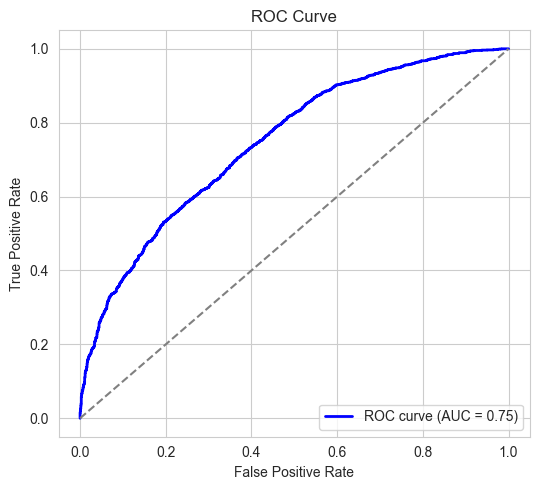

In [6]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

print("Gradient Boosting")
metriques(gb_model,X_test,y_test)
curva_ROC(gb_model,X_test,y_test)

SVM
              precision    recall  f1-score   support

           0       0.68      0.50      0.58      1783
           1       0.64      0.79      0.71      1981

    accuracy                           0.65      3764
   macro avg       0.66      0.65      0.64      3764
weighted avg       0.66      0.65      0.64      3764

Accuracy: 0.6527630180658873


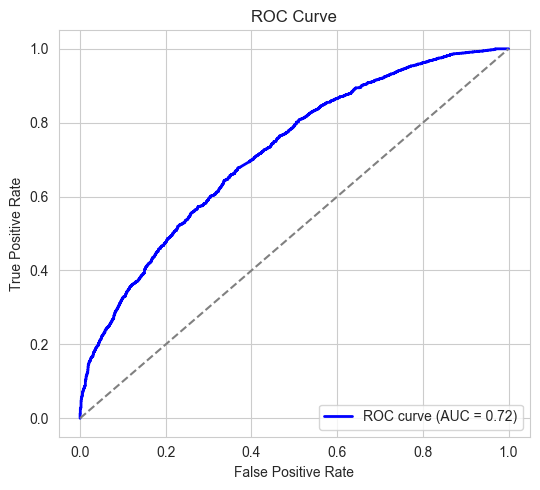

In [7]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

print("SVM")
metriques(svm_model,X_test,y_test)
curva_ROC(svm_model,X_test,y_test)

Random Forest
              precision    recall  f1-score   support

           0       0.64      0.63      0.63      1783
           1       0.67      0.68      0.68      1981

    accuracy                           0.66      3764
   macro avg       0.65      0.65      0.65      3764
weighted avg       0.66      0.66      0.66      3764

Accuracy: 0.655951115834219


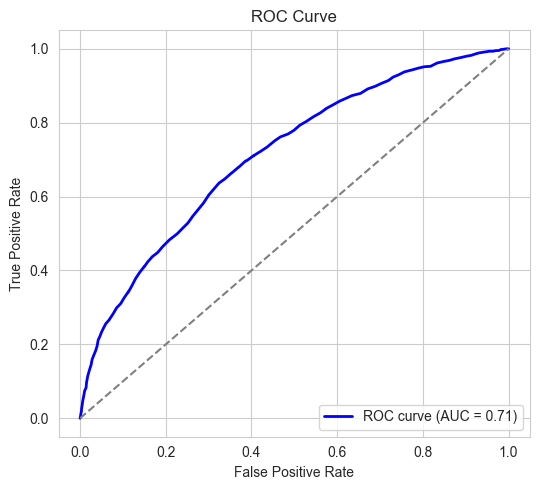

In [8]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

print("Random Forest")
metriques(rf_model,X_test,y_test)
curva_ROC(rf_model,X_test,y_test)

Hem decidit descartar el model de SVM ja que el temps d'execució és massa alt i, com l'hem d'executar moltes vegades, considerem que no ens val la pena.


N_PLIES = 0
              precision    recall  f1-score   support

           0       0.65      0.61      0.63      1783
           1       0.67      0.70      0.68      1981

    accuracy                           0.66      3764
   macro avg       0.66      0.66      0.66      3764
weighted avg       0.66      0.66      0.66      3764

Accuracy: 0.6596705632306057


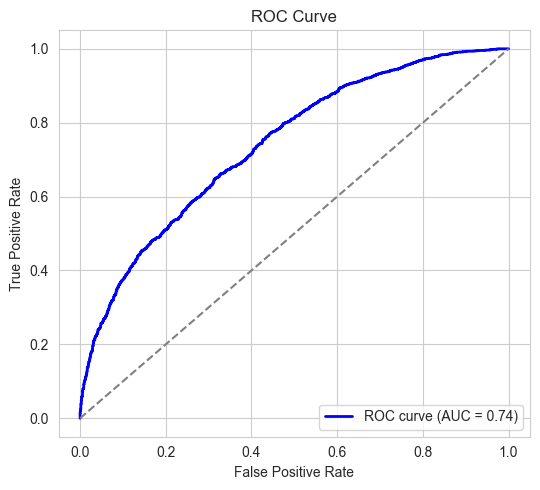


N_PLIES = 10
              precision    recall  f1-score   support

           0       0.63      0.64      0.63      1700
           1       0.69      0.69      0.69      2004

    accuracy                           0.66      3704
   macro avg       0.66      0.66      0.66      3704
weighted avg       0.66      0.66      0.66      3704

Accuracy: 0.6638768898488121


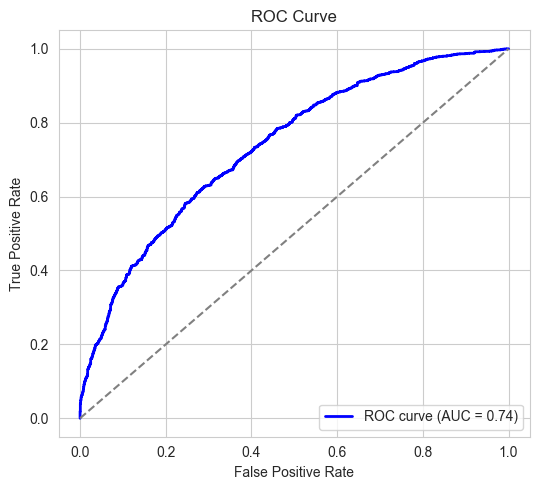


N_PLIES = 20
              precision    recall  f1-score   support

           0       0.69      0.66      0.68      1719
           1       0.69      0.71      0.70      1784

    accuracy                           0.69      3503
   macro avg       0.69      0.69      0.69      3503
weighted avg       0.69      0.69      0.69      3503

Accuracy: 0.6882671995432487


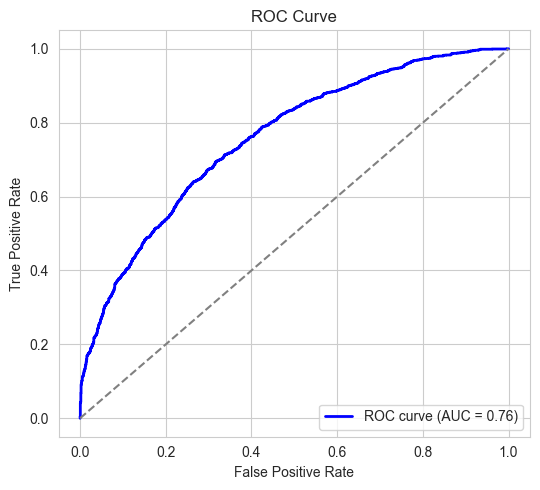


N_PLIES = 30
              precision    recall  f1-score   support

           0       0.70      0.67      0.69      1574
           1       0.69      0.71      0.70      1603

    accuracy                           0.69      3177
   macro avg       0.69      0.69      0.69      3177
weighted avg       0.69      0.69      0.69      3177

Accuracy: 0.6940509915014165


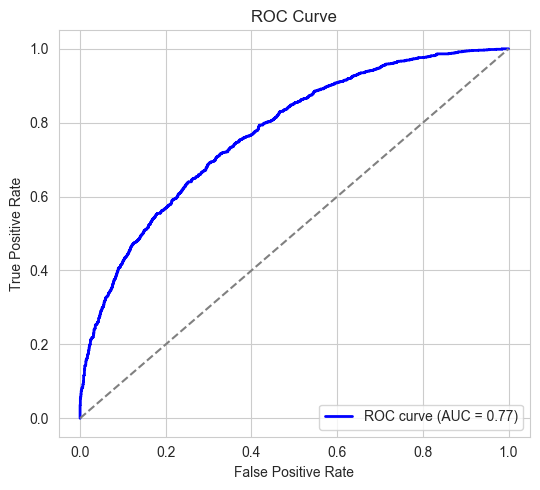


N_PLIES = 40
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1360
           1       0.73      0.71      0.72      1361

    accuracy                           0.72      2721
   macro avg       0.72      0.72      0.72      2721
weighted avg       0.72      0.72      0.72      2721

Accuracy: 0.7239985299522235


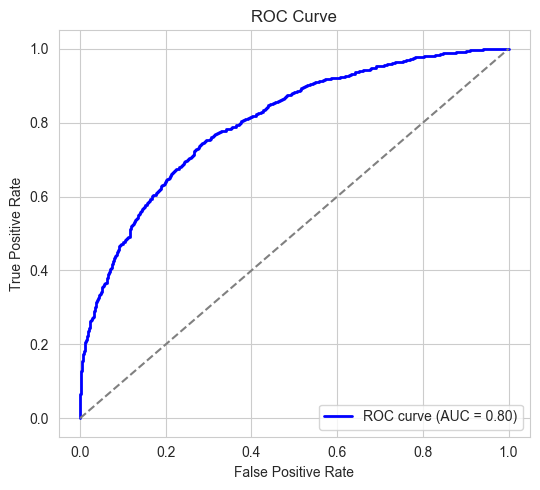


N_PLIES = 50
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      1106
           1       0.76      0.76      0.76      1086

    accuracy                           0.76      2192
   macro avg       0.76      0.76      0.76      2192
weighted avg       0.76      0.76      0.76      2192

Accuracy: 0.7632299270072993


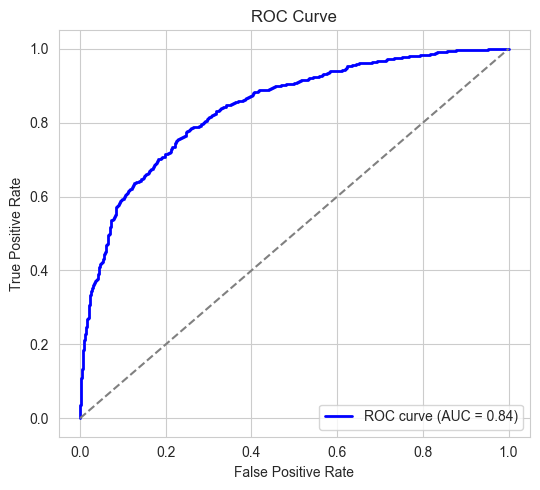


N_PLIES = 60
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       852
           1       0.77      0.77      0.77       795

    accuracy                           0.78      1647
   macro avg       0.78      0.78      0.78      1647
weighted avg       0.78      0.78      0.78      1647

Accuracy: 0.7802064359441409


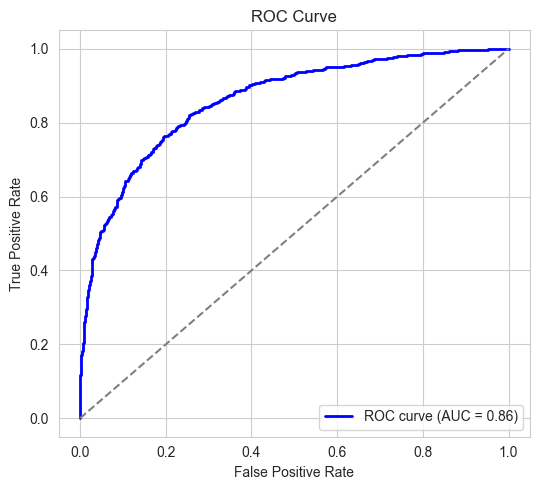


N_PLIES = 80
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       434
           1       0.83      0.79      0.81       437

    accuracy                           0.81       871
   macro avg       0.81      0.81      0.81       871
weighted avg       0.81      0.81      0.81       871

Accuracy: 0.8140068886337543


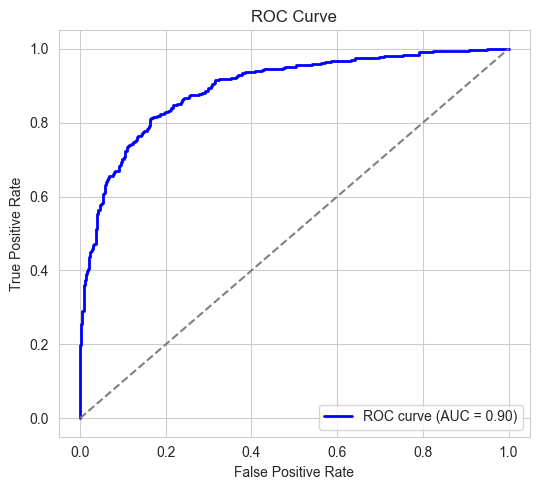


N_PLIES = 100
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       237
           1       0.85      0.83      0.84       206

    accuracy                           0.86       443
   macro avg       0.86      0.85      0.85       443
weighted avg       0.86      0.86      0.86       443

Accuracy: 0.8555304740406321


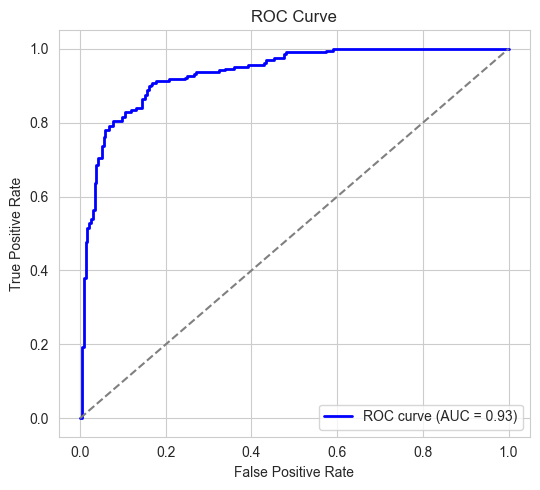


N_PLIES = 120
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       104
           1       0.92      0.90      0.91        90

    accuracy                           0.92       194
   macro avg       0.92      0.92      0.92       194
weighted avg       0.92      0.92      0.92       194

Accuracy: 0.9175257731958762


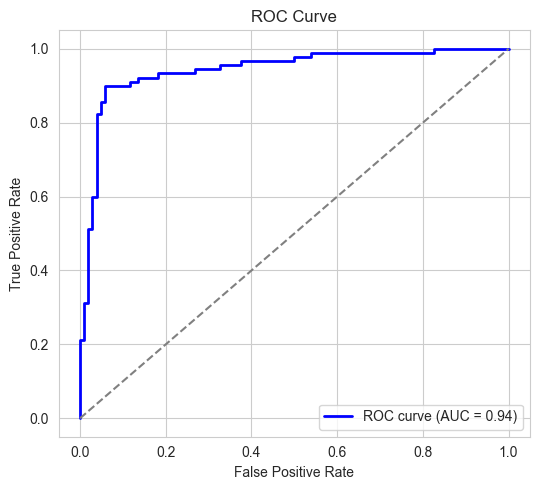


N_PLIES = 150
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        26
           1       0.84      1.00      0.91        21

    accuracy                           0.91        47
   macro avg       0.92      0.92      0.91        47
weighted avg       0.93      0.91      0.92        47

Accuracy: 0.9148936170212766


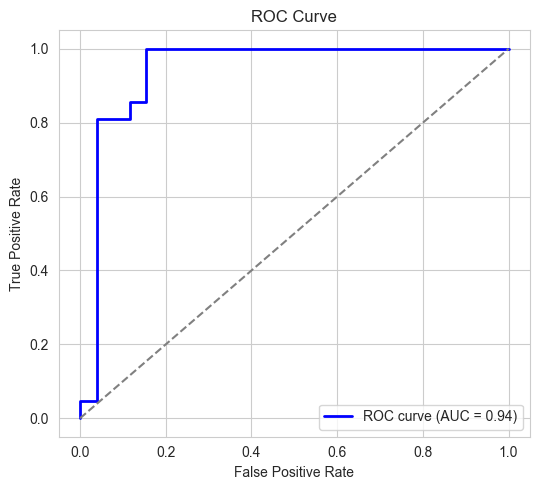


RESULTATS AMB REGRESSIÓ LOGÍSTICA:

      N  accuracy  n_partides
0     0  0.651700       18820
1    10  0.705184       18516
2    20  0.658007       17515
3    30  0.619452       15882
4    40  0.642411       13605
5    50  0.612682       10956
6    60  0.610200        8234
7    80  0.582090        4353
8   100  0.577878        2213
9   120  0.530928         970
10  150  0.489362         231


In [9]:
# llista de les N que utilitzarem
N_list = [0, 10, 20, 30, 40, 50, 60, 80, 100, 120, 150]

results = []

for N_PLIES in N_list:
    print("\n==============================")
    print(f"N_PLIES = {N_PLIES}")
    print("==============================")
    df["num_plies"] = df["moves"].apply(count_plies)

    df_filtered = df[df["num_plies"] >= N_PLIES].copy()
    df_filtered.reset_index(drop=True, inplace=True)

    df_filtered = add_move_features(df_filtered, n_moves=N_PLIES)

    X = df_filtered[explanatory_variables]
    y = df_filtered[target_variable]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    log_model = LogisticRegression(max_iter=1000)
    log_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    metriques(log_model, X_test, y_test)
    curva_ROC(log_model, X_test, y_test)

    # Guardem resultats
    results.append({
        "N": N_PLIES,
        "accuracy": accuracy_score(y_test, y_pred),
        "n_partides": len(df_filtered)
    })

# Mostrar taula final
results_df = pd.DataFrame(results)
print("\nRESULTATS AMB REGRESSIÓ LOGÍSTICA:\n")
print(results_df)


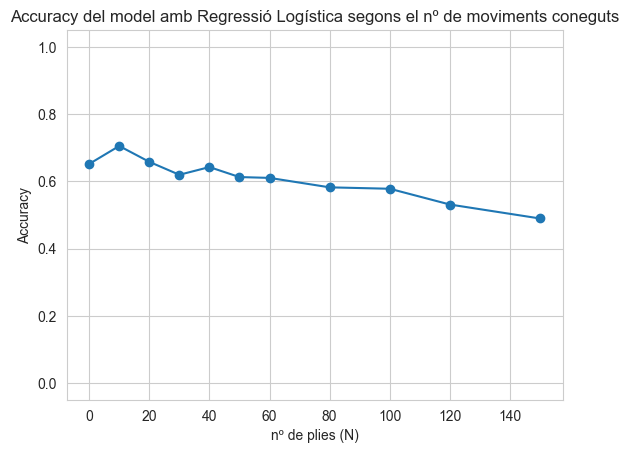

In [10]:
results
plt.plot(results_df["N"], results_df["accuracy"], marker='o')
plt.ylim(-0.05,1.05)
plt.xlabel("nº de plies (N)")
plt.ylabel("Accuracy")
plt.title("Accuracy del model amb Regressió Logística segons el nº de moviments coneguts")
plt.show()


N_PLIES = 0
              precision    recall  f1-score   support

           0       0.65      0.62      0.64      1783
           1       0.67      0.70      0.69      1981

    accuracy                           0.66      3764
   macro avg       0.66      0.66      0.66      3764
weighted avg       0.66      0.66      0.66      3764

Accuracy: 0.6628586609989373


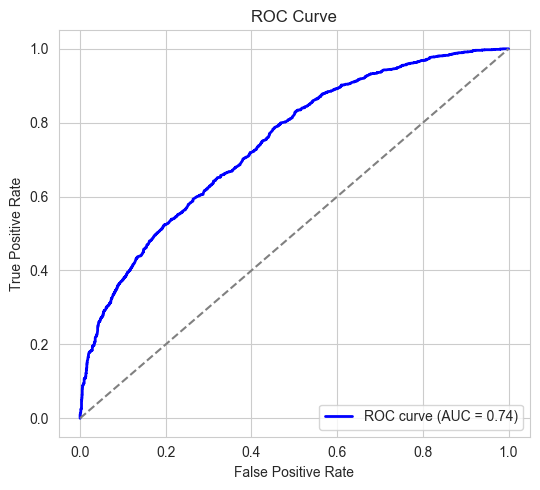


N_PLIES = 10
              precision    recall  f1-score   support

           0       0.63      0.64      0.63      1700
           1       0.69      0.69      0.69      2004

    accuracy                           0.66      3704
   macro avg       0.66      0.66      0.66      3704
weighted avg       0.66      0.66      0.66      3704

Accuracy: 0.6625269978401728


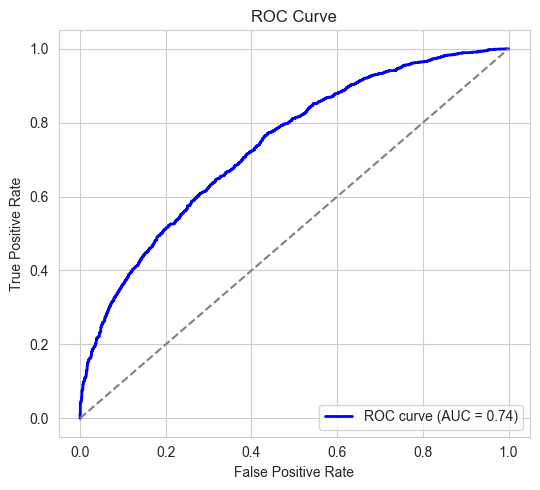


N_PLIES = 20
              precision    recall  f1-score   support

           0       0.68      0.66      0.67      1719
           1       0.68      0.70      0.69      1784

    accuracy                           0.68      3503
   macro avg       0.68      0.68      0.68      3503
weighted avg       0.68      0.68      0.68      3503

Accuracy: 0.681130459606052


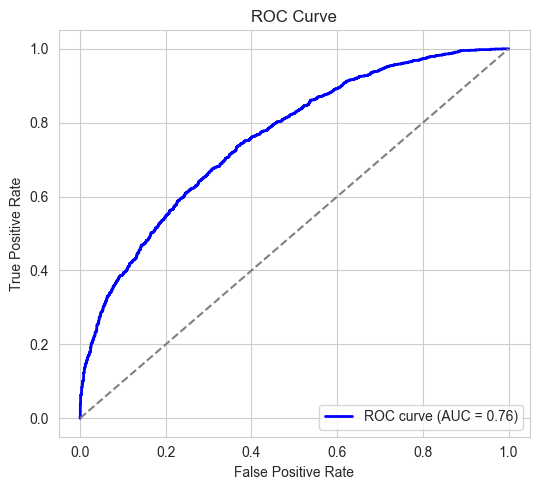


N_PLIES = 30
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1574
           1       0.70      0.69      0.70      1603

    accuracy                           0.70      3177
   macro avg       0.70      0.70      0.70      3177
weighted avg       0.70      0.70      0.70      3177

Accuracy: 0.6959395656279509


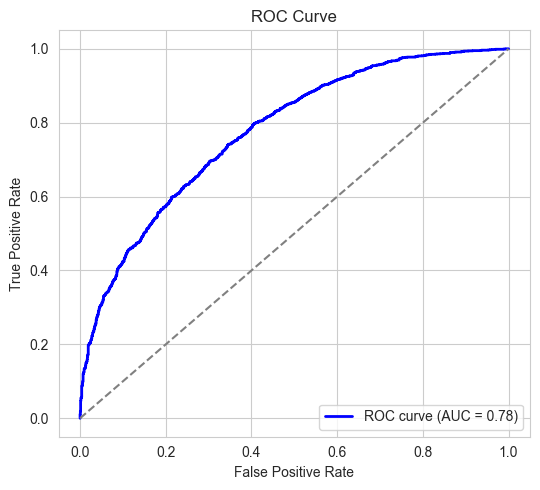


N_PLIES = 40
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1360
           1       0.73      0.71      0.72      1361

    accuracy                           0.72      2721
   macro avg       0.72      0.72      0.72      2721
weighted avg       0.72      0.72      0.72      2721

Accuracy: 0.7239985299522235


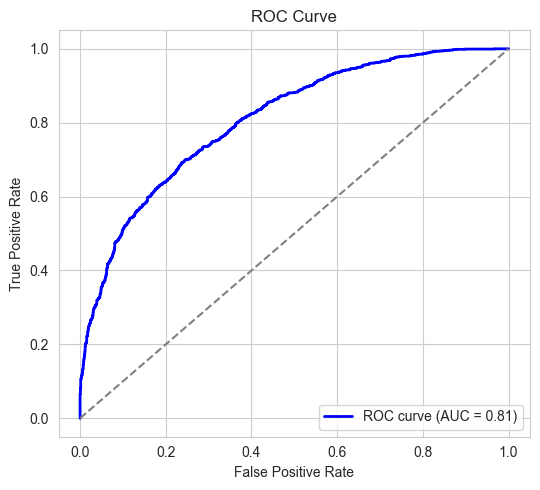


N_PLIES = 50
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1106
           1       0.77      0.76      0.76      1086

    accuracy                           0.77      2192
   macro avg       0.77      0.77      0.77      2192
weighted avg       0.77      0.77      0.77      2192

Accuracy: 0.7696167883211679


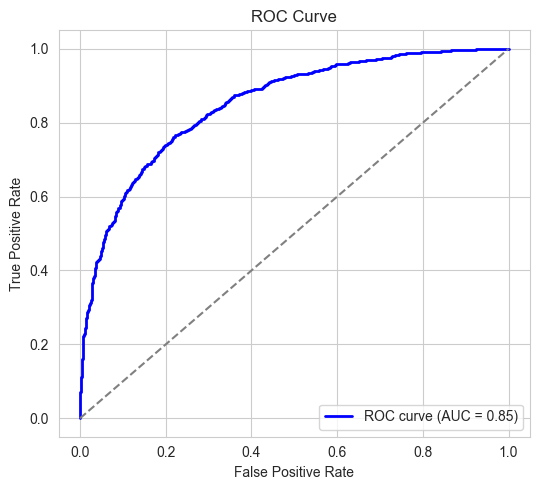


N_PLIES = 60
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       852
           1       0.78      0.77      0.77       795

    accuracy                           0.78      1647
   macro avg       0.78      0.78      0.78      1647
weighted avg       0.78      0.78      0.78      1647

Accuracy: 0.7844565877352763


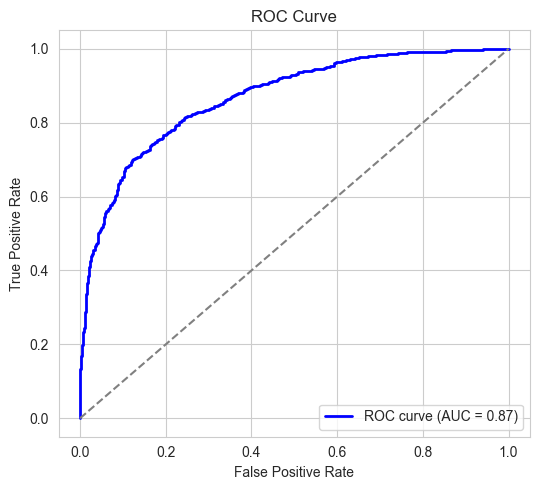


N_PLIES = 80
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       434
           1       0.82      0.81      0.82       437

    accuracy                           0.82       871
   macro avg       0.82      0.82      0.82       871
weighted avg       0.82      0.82      0.82       871

Accuracy: 0.8151549942594719


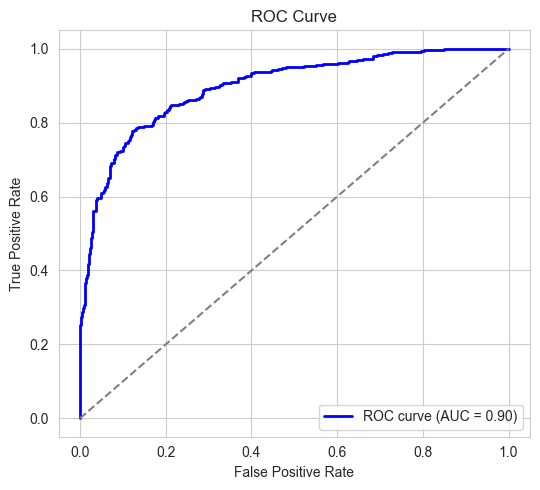


N_PLIES = 100
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       237
           1       0.84      0.84      0.84       206

    accuracy                           0.85       443
   macro avg       0.85      0.85      0.85       443
weighted avg       0.85      0.85      0.85       443

Accuracy: 0.8532731376975169


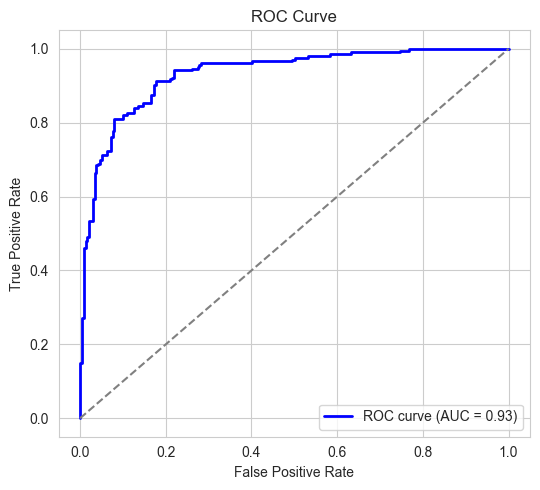


N_PLIES = 120
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       104
           1       0.89      0.90      0.90        90

    accuracy                           0.90       194
   macro avg       0.90      0.90      0.90       194
weighted avg       0.90      0.90      0.90       194

Accuracy: 0.9020618556701031


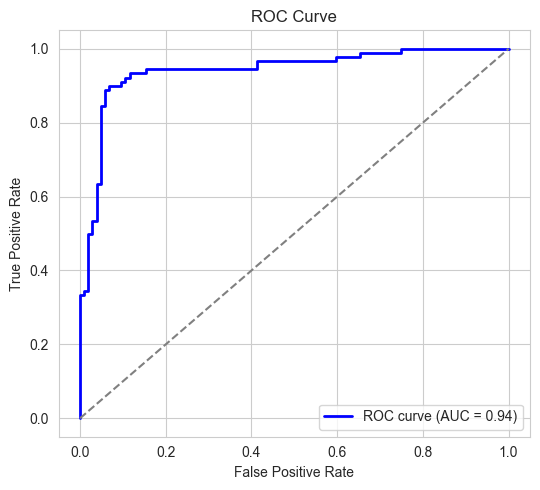


N_PLIES = 150
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.95      1.00      0.98        21

    accuracy                           0.98        47
   macro avg       0.98      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47

Accuracy: 0.9787234042553191


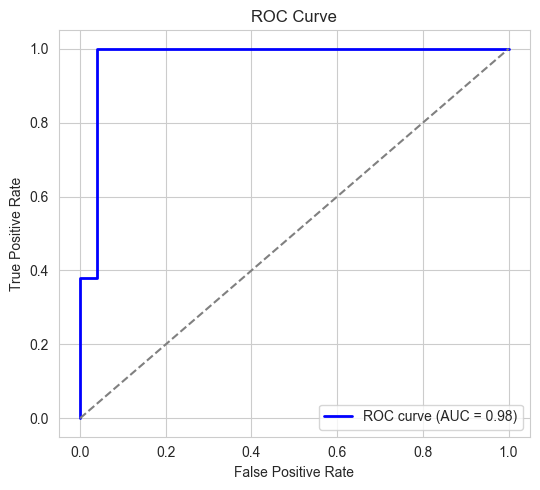


RESULTATS FINALS AMB GRADIENT BOOSTING:

      N  accuracy  n_partides
0     0  0.662859       18820
1    10  0.662527       18516
2    20  0.681130       17515
3    30  0.695940       15882
4    40  0.723999       13605
5    50  0.769617       10956
6    60  0.784457        8234
7    80  0.815155        4353
8   100  0.853273        2213
9   120  0.902062         970
10  150  0.978723         231


In [11]:
results = []

for N_PLIES in N_list:
    print("\n==============================")
    print(f"N_PLIES = {N_PLIES}")
    print("==============================")
    df["num_plies"] = df["moves"].apply(count_plies)

    df_filtered = df[df["num_plies"] >= N_PLIES].copy()
    df_filtered.reset_index(drop=True, inplace=True)

    df_filtered = add_move_features(df_filtered, n_moves=N_PLIES)

    X = df_filtered[explanatory_variables]
    y = df_filtered[target_variable]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    gb_model = GradientBoostingClassifier()
    gb_model.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)

    metriques(gb_model, X_test, y_test)
    curva_ROC(gb_model, X_test, y_test)

    results.append({
        "N": N_PLIES,
        "accuracy": accuracy_score(y_test, y_pred),
        "n_partides": len(df_filtered)
    })

results_df = pd.DataFrame(results)
print("\nRESULTATS FINALS AMB GRADIENT BOOSTING:\n")
print(results_df)


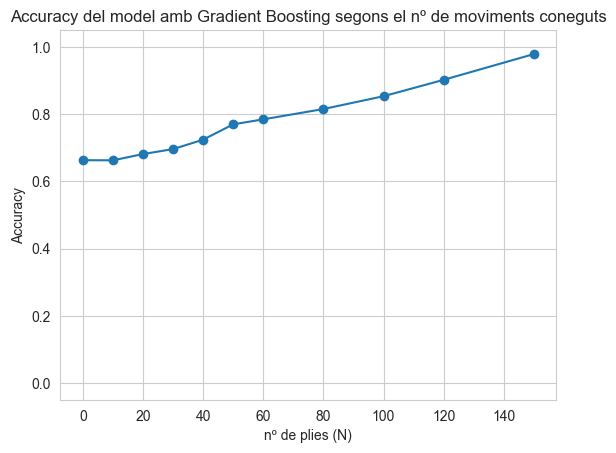

In [12]:
results
plt.plot(results_df["N"], results_df["accuracy"], marker='o')
plt.ylim(-0.05,1.05)
plt.xlabel("nº de plies (N)")
plt.ylabel("Accuracy")
plt.title("Accuracy del model amb Gradient Boosting segons el nº de moviments coneguts")
plt.show()


N_PLIES = 0
              precision    recall  f1-score   support

           0       0.61      0.60      0.60      1783
           1       0.64      0.65      0.65      1981

    accuracy                           0.63      3764
   macro avg       0.63      0.63      0.63      3764
weighted avg       0.63      0.63      0.63      3764

Accuracy: 0.6275239107332625


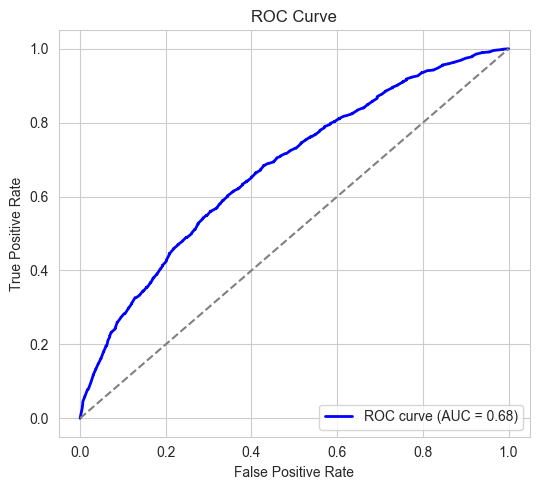


N_PLIES = 10
              precision    recall  f1-score   support

           0       0.62      0.65      0.63      1700
           1       0.69      0.66      0.67      2004

    accuracy                           0.65      3704
   macro avg       0.65      0.65      0.65      3704
weighted avg       0.65      0.65      0.65      3704

Accuracy: 0.6528077753779697


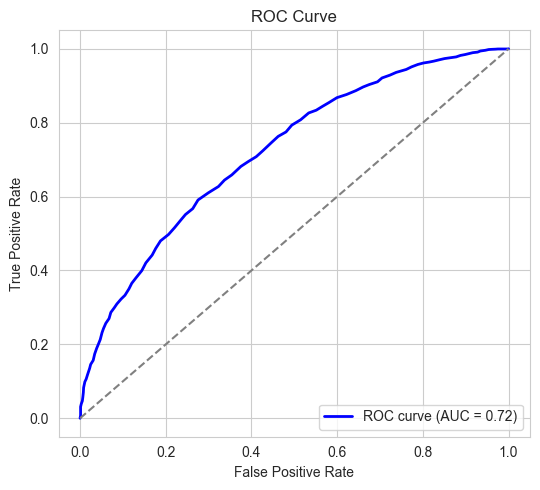


N_PLIES = 20
              precision    recall  f1-score   support

           0       0.66      0.67      0.67      1719
           1       0.68      0.67      0.68      1784

    accuracy                           0.67      3503
   macro avg       0.67      0.67      0.67      3503
weighted avg       0.67      0.67      0.67      3503

Accuracy: 0.6722809020839281


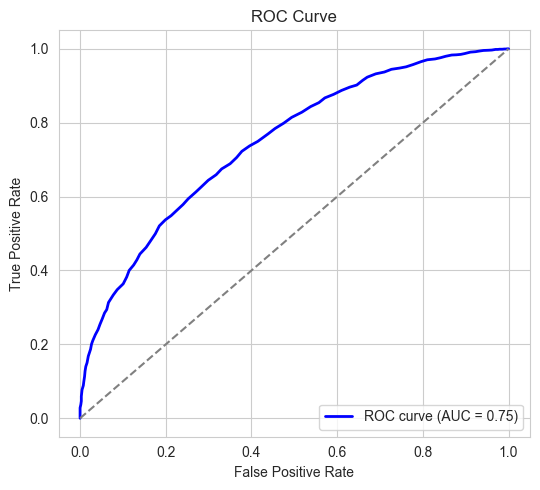


N_PLIES = 30
              precision    recall  f1-score   support

           0       0.68      0.69      0.68      1574
           1       0.69      0.69      0.69      1603

    accuracy                           0.69      3177
   macro avg       0.69      0.69      0.69      3177
weighted avg       0.69      0.69      0.69      3177

Accuracy: 0.6858671702864337


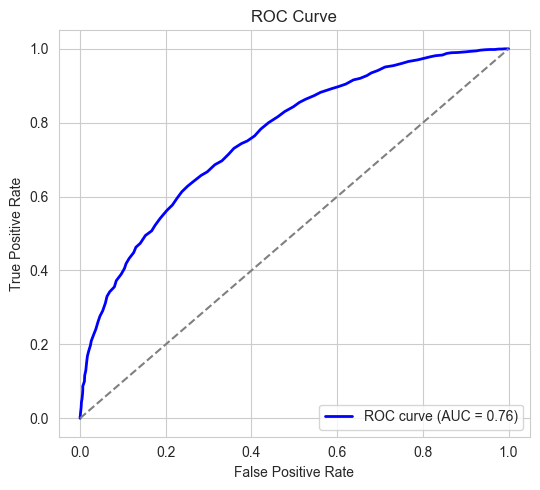


N_PLIES = 40
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1360
           1       0.74      0.71      0.73      1361

    accuracy                           0.73      2721
   macro avg       0.73      0.73      0.73      2721
weighted avg       0.73      0.73      0.73      2721

Accuracy: 0.7331863285556781


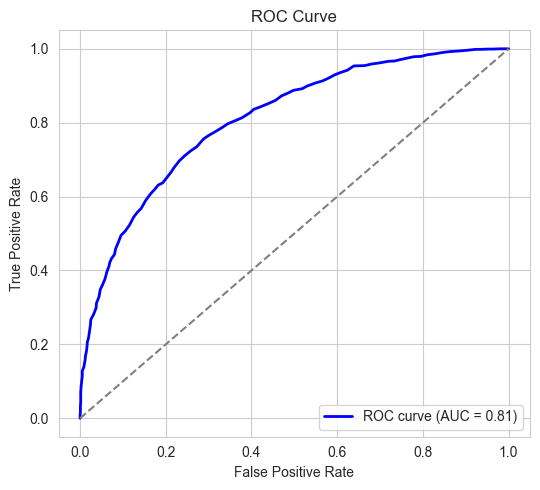


N_PLIES = 50
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1106
           1       0.78      0.74      0.76      1086

    accuracy                           0.77      2192
   macro avg       0.77      0.77      0.77      2192
weighted avg       0.77      0.77      0.77      2192

Accuracy: 0.7677919708029197


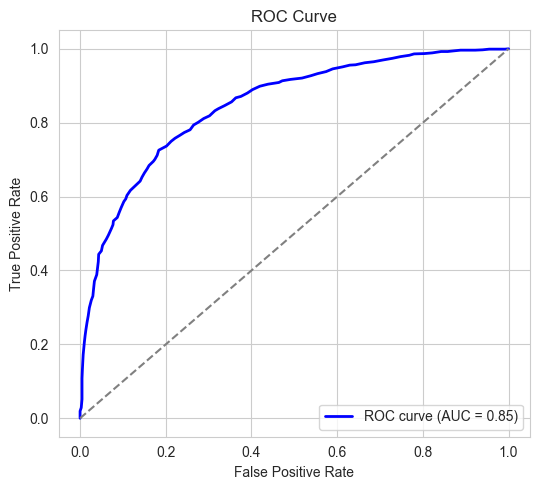


N_PLIES = 60
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       852
           1       0.79      0.78      0.78       795

    accuracy                           0.79      1647
   macro avg       0.79      0.79      0.79      1647
weighted avg       0.79      0.79      0.79      1647

Accuracy: 0.7911353976927747


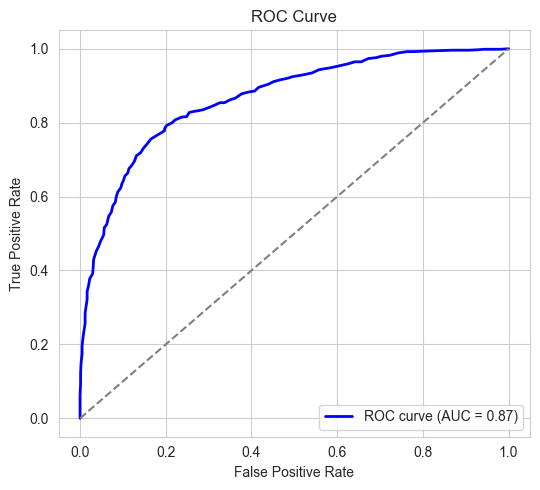


N_PLIES = 80
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       434
           1       0.82      0.81      0.82       437

    accuracy                           0.82       871
   macro avg       0.82      0.82      0.82       871
weighted avg       0.82      0.82      0.82       871

Accuracy: 0.8197474167623421


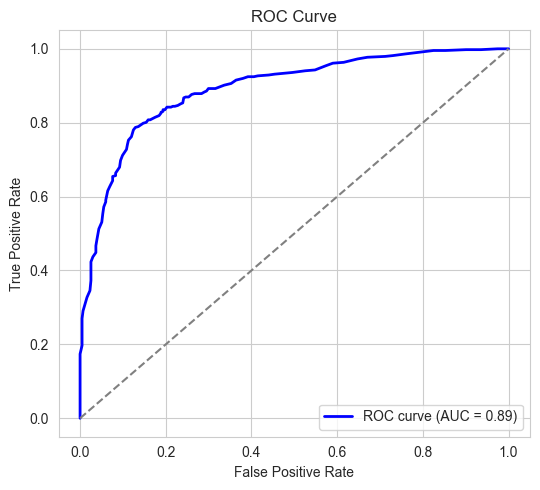


N_PLIES = 100
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       237
           1       0.83      0.85      0.84       206

    accuracy                           0.85       443
   macro avg       0.85      0.85      0.85       443
weighted avg       0.85      0.85      0.85       443

Accuracy: 0.8510158013544018


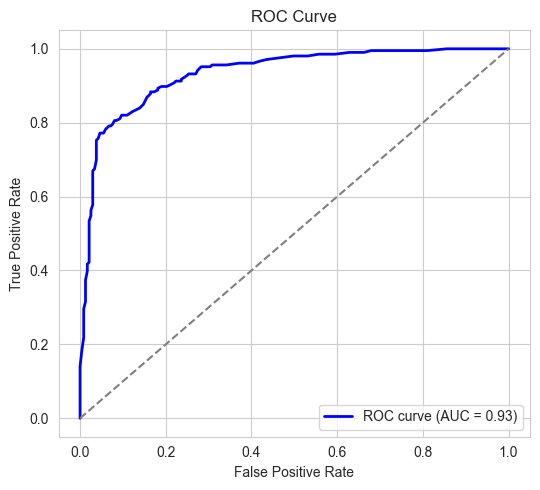


N_PLIES = 120
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       104
           1       0.92      0.90      0.91        90

    accuracy                           0.92       194
   macro avg       0.92      0.92      0.92       194
weighted avg       0.92      0.92      0.92       194

Accuracy: 0.9175257731958762


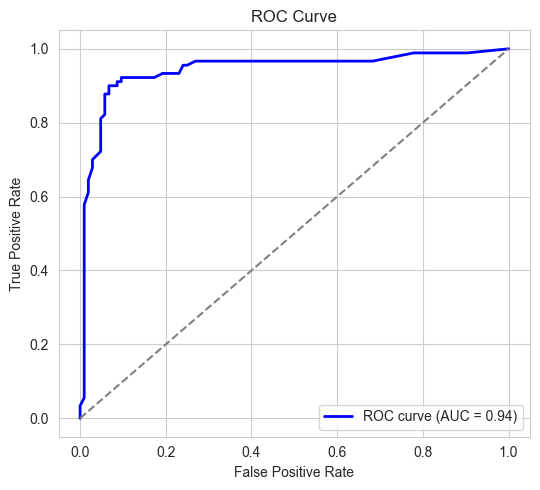


N_PLIES = 150
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.95      1.00      0.98        21

    accuracy                           0.98        47
   macro avg       0.98      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47

Accuracy: 0.9787234042553191


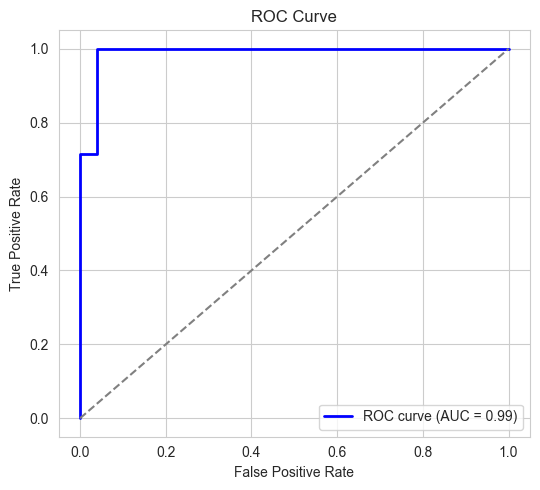


RESULTATS FINALS AMB RANDOM FOREST:

      N  accuracy  n_partides
0     0  0.627524       18820
1    10  0.652808       18516
2    20  0.672281       17515
3    30  0.685867       15882
4    40  0.733186       13605
5    50  0.767792       10956
6    60  0.791135        8234
7    80  0.819747        4353
8   100  0.851016        2213
9   120  0.917526         970
10  150  0.978723         231


In [13]:
results = []

for N_PLIES in N_list:
    print("\n==============================")
    print(f"N_PLIES = {N_PLIES}")
    print("==============================")
    df["num_plies"] = df["moves"].apply(count_plies)

    df_filtered = df[df["num_plies"] >= N_PLIES].copy()
    df_filtered.reset_index(drop=True, inplace=True)

    df_filtered = add_move_features(df_filtered, n_moves=N_PLIES)

    X = df_filtered[explanatory_variables]
    y = df_filtered[target_variable]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    metriques(rf_model, X_test, y_test)
    curva_ROC(rf_model, X_test, y_test)

    results.append({
        "N": N_PLIES,
        "accuracy": accuracy_score(y_test, y_pred),
        "n_partides": len(df_filtered)
    })

results_df = pd.DataFrame(results)
print("\nRESULTATS FINALS AMB RANDOM FOREST:\n")
print(results_df)


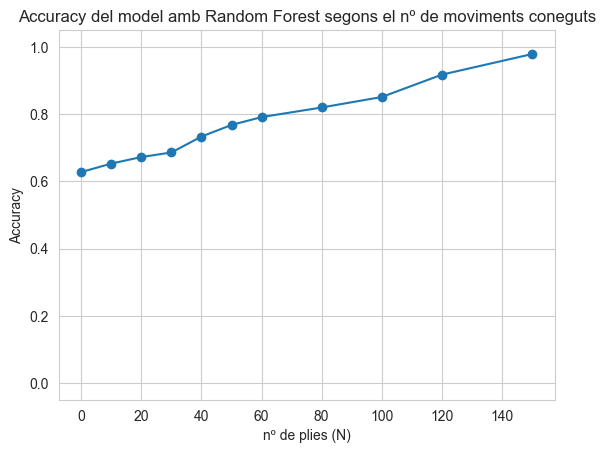

In [14]:
plt.plot(results_df["N"], results_df["accuracy"], marker='o')
plt.ylim(-0.05,1.05)
plt.xlabel("nº de plies (N)")
plt.ylabel("Accuracy")
plt.title("Accuracy del model amb Random Forest segons el nº de moviments coneguts")
plt.show()

Podem veure com en la Regressió Logística empitjora a mesura que afegim més moviments ja que el model no capta bé les relacions entre les variables i la variable objectiu, llavors descartarem aquest model.

Ara passarem a fer la cerca d'hiperparàmetres i la validació creuada, que ho farem amb el Gradient Boosting i el Random Forest. No ho farem per tots els valors de N anteriors, sinò que decidirem uns en concret. La mitjana de moviments és de 60, per tant, volem utilitzar un nombre menor a aquest, ja que si utilitzem una N molt propera a 60, és probable que moltes de les partides estiguin a punt d'acabar, de manera que predir el resultat serà trivial. Per tant, utilitzarem N = 35, per tal d'assegurar-nos que la majoria de les partides no estan a punt d'acabar.

In [15]:
df["num_plies"] = df["moves"].apply(count_plies)

df_filtered = df[df["num_plies"] >= 35].copy()
df_filtered.reset_index(drop=True, inplace=True)
df_filtered = add_move_features(df_filtered, n_moves=35)

explanatory_variables = [
                        #Variables prèvies
                        'diff_rating', 
                        'diff_global_winrate',
                        'vs_white_winrate', 'vs_prev_matches',
                        'diff_win_streak',
                        'diff_loss_streak',

                        'white_piece_count', 'black_piece_count',

                        # Variables de material
                        'white_material_value', 'black_material_value', 'material_balance',
                        
                        # Control del centre
                        'white_center_control',
                        'black_center_control',
                        
                        # Mobilitat
                        'white_mobility',
                        'black_mobility',
                        
                        # PST / Piece-Square Table
                        'white_PST',
                        'black_PST',
                        
                        # Espai
                        'white_space',
                        'black_space'
                        ]
target_variable = "winner"

X = df_filtered[explanatory_variables]
y = df_filtered[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Millors hiperparàmetres Gradient Boosting:
{'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 3, 'learning_rate': 0.1}

Gradient Boosting (RandomizedSearchCV)
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1409
           1       0.74      0.75      0.75      1556

    accuracy                           0.73      2965
   macro avg       0.73      0.73      0.73      2965
weighted avg       0.73      0.73      0.73      2965

Accuracy: 0.7328836424957842


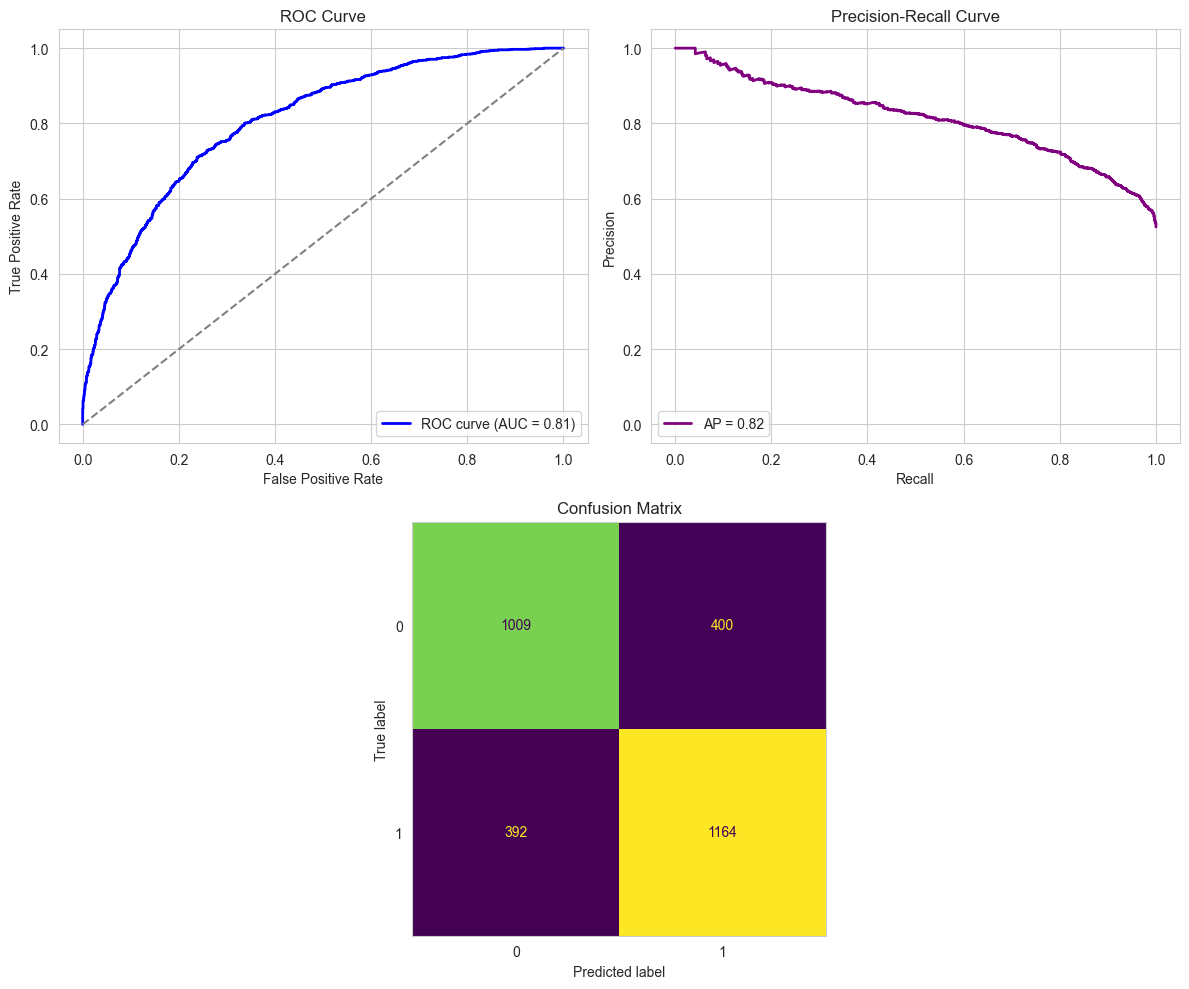

In [16]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

gb_model = GradientBoostingClassifier(random_state=42)
param_dist = {
    'n_estimators': [100, 200, 300, 500, 800, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3],
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'max_features': ['sqrt', 'log2', None],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=20,         
    scoring="accuracy", 
    cv=cv,
    n_jobs=-1,
    verbose=2
)

random_search.fit(X_train, y_train)

print("Millors hiperparàmetres Gradient Boosting:")
print(random_search.best_params_)

best_gb = random_search.best_estimator_
print("\nGradient Boosting (RandomizedSearchCV)")
metriques(best_gb, X_test, y_test)
grafiques(best_gb, X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Millors hiperparàmetres Random Forest:
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}

Random Forest (RandomizedSearchCV)
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1409
           1       0.74      0.74      0.74      1556

    accuracy                           0.73      2965
   macro avg       0.73      0.73      0.73      2965
weighted avg       0.73      0.73      0.73      2965

Accuracy: 0.7318718381112985


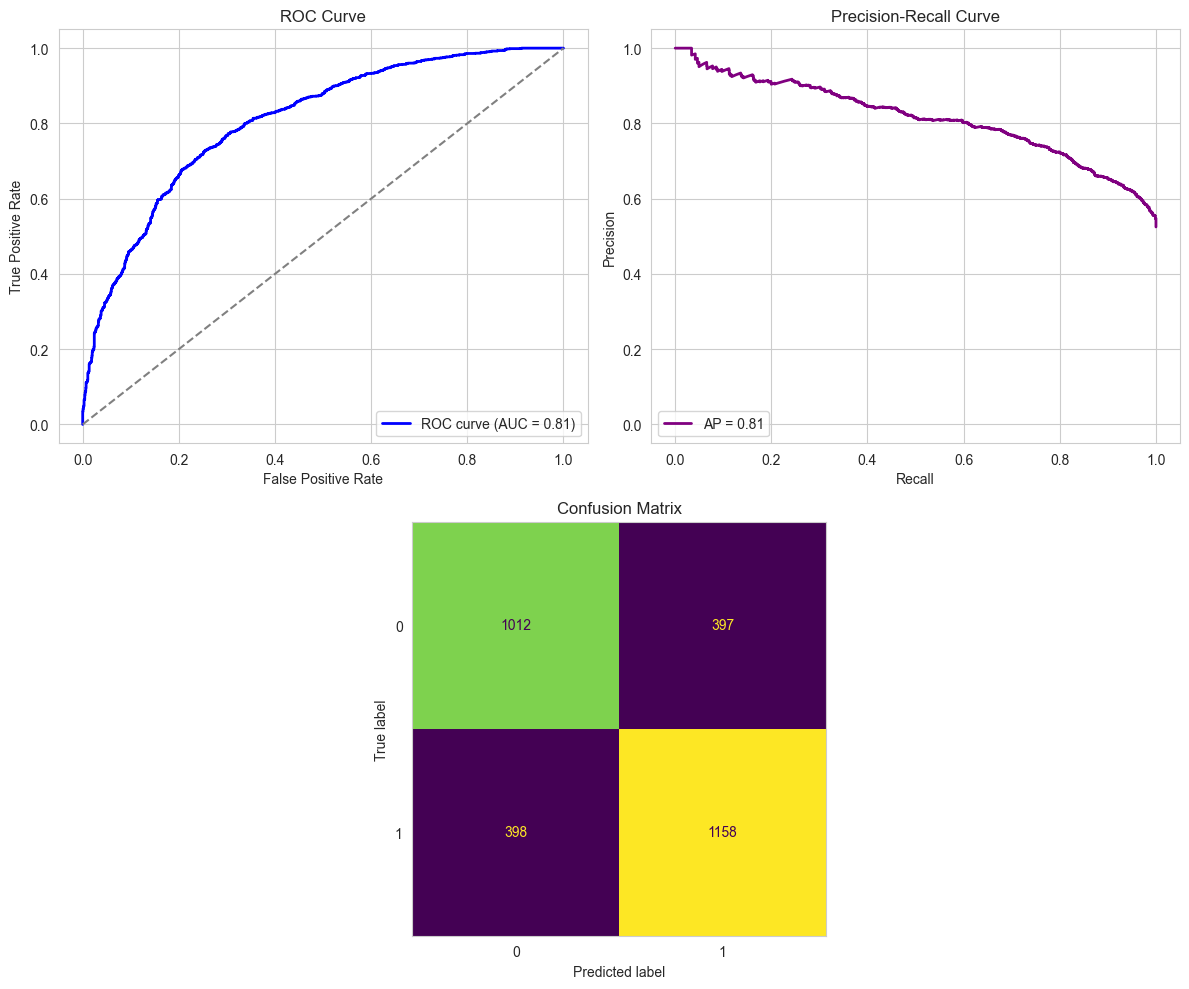

In [17]:
rf_model = RandomForestClassifier(random_state=42)

param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True, False]
}

random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,       
    scoring="accuracy", 
    cv=cv,
    n_jobs=-1,
    verbose=2
)

random_search_rf.fit(X_train, y_train)

print("Millors hiperparàmetres Random Forest:")
print(random_search_rf.best_params_)

best_rf = random_search_rf.best_estimator_

print("\nRandom Forest (RandomizedSearchCV)")
metriques(best_rf, X_test, y_test)
grafiques(best_rf, X_test, y_test)

### RESULTATS DEL MODEL FINAL

In [18]:
N_list = [0, 10, 20, 30, 35, 40, 50, 60, 80, 100, 120, 150]
results = []

for N_PLIES in N_list:
    df["num_plies"] = df["moves"].apply(count_plies)
    df_filtered = df[df["num_plies"] >= N_PLIES].copy()
    df_filtered.reset_index(drop=True, inplace=True)

    df_filtered = add_move_features(df_filtered, n_moves=N_PLIES)

    X = df_filtered[explanatory_variables]
    y = df_filtered[target_variable]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    gb_model = GradientBoostingClassifier(subsample=0.6, n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features='log2', max_depth=4, learning_rate=0.05)
    gb_model.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)

    results.append({
        "N": N_PLIES,
        "accuracy": accuracy_score(y_test, y_pred),
        "n_partides": len(df_filtered)
    })

results_df = pd.DataFrame(results)
print("\nRESULTATS FINALS AMB GRADIENT BOOSTING:\n")
print(results_df)



RESULTATS FINALS AMB GRADIENT BOOSTING:

      N  accuracy  n_partides
0     0  0.662859       18820
1    10  0.664417       18516
2    20  0.683414       17515
3    30  0.688700       15882
4    35  0.733558       14825
5    40  0.725836       13605
6    50  0.765511       10956
7    60  0.784457        8234
8    80  0.820896        4353
9   100  0.866817        2213
10  120  0.922680         970
11  150  0.957447         231


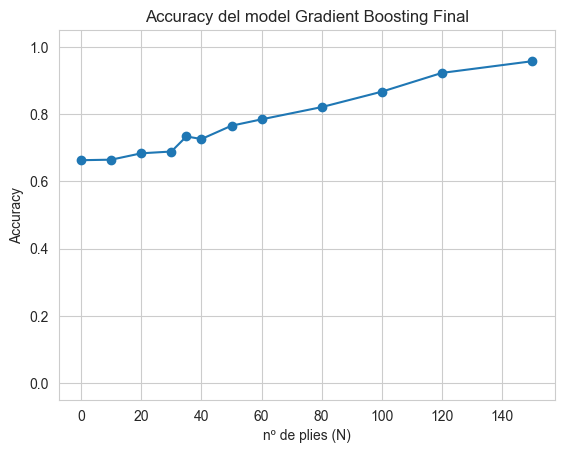

In [22]:
plt.plot(results_df["N"], results_df["accuracy"], marker='o')
plt.xlabel("nº de plies (N)")
plt.ylim(-0.05,1.05)
plt.ylabel("Accuracy")
plt.title("Accuracy del model Gradient Boosting Final")
plt.show()

In [20]:
df["num_plies"] = df["moves"].apply(count_plies)

df_filtered = df[df["num_plies"] >= 35].copy()
df_filtered.reset_index(drop=True, inplace=True)
df_filtered = add_move_features(df_filtered, n_moves=35)

explanatory_variables = [
                        #Variables prèvies
                        'diff_rating', 
                        'diff_global_winrate',
                        'vs_white_winrate', 'vs_prev_matches',
                        'diff_win_streak',
                        'diff_loss_streak',

                        'white_piece_count', 'black_piece_count',

                        # Variables de material
                        'white_material_value', 'black_material_value', 'material_balance',
                        
                        # Control del centre
                        'white_center_control',
                        'black_center_control',
                        
                        # Mobilitat
                        'white_mobility',
                        'black_mobility',
                        
                        # PST / Piece-Square Table
                        'white_PST',
                        'black_PST',
                        
                        # Espai
                        'white_space',
                        'black_space'
                        ]
target_variable = "winner"

X = df_filtered[explanatory_variables]
y = df_filtered[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

           0       0.73      0.72      0.72      1409
           1       0.75      0.75      0.75      1556

    accuracy                           0.74      2965
   macro avg       0.74      0.74      0.74      2965
weighted avg       0.74      0.74      0.74      2965

Accuracy: 0.736256323777403


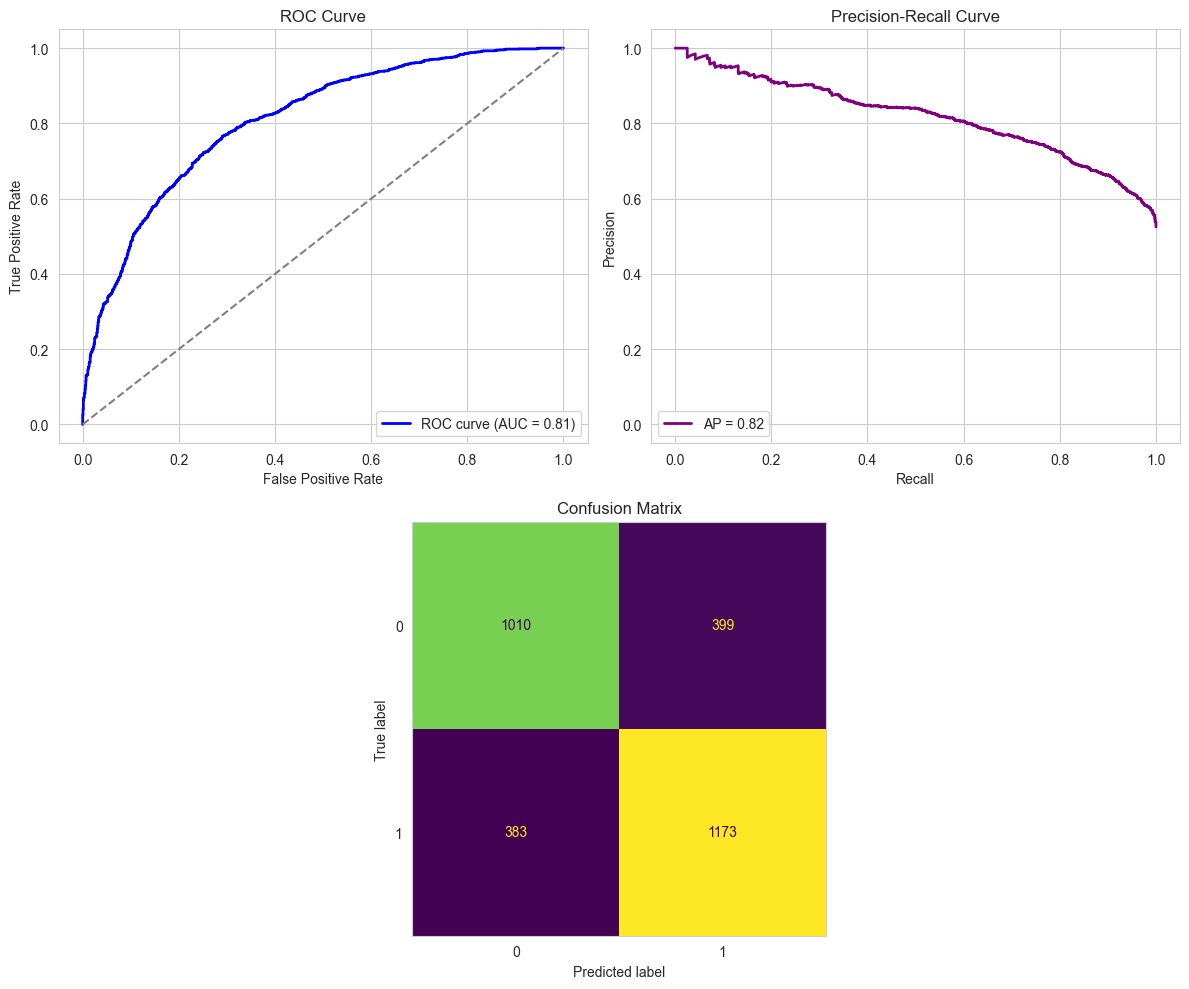

In [21]:
gb_model = GradientBoostingClassifier(subsample=0.6, n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features='log2', max_depth=4, learning_rate=0.05)
gb_model.fit(X_train, y_train)

metriques(gb_model,X_test,y_test)
grafiques(gb_model,X_test,y_test)